Task 4: Столбиковые диаграммы
Для каждого часа подсчитайте среднее количество коммитов в рабочие дни и в выходные (если в течение часа в одну из дат не было коммитов, не используйте его для расчета среднего значения). Используйте эти значения для расчета средних в категории "рабочие дни" и в категории "выходные" и дальнешего построения графика, например: понедельник, 17–18: 5 коммитов; вторник, 17–18: 6 коммитов; среда, 17–18: 7 коммитов.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
from sqlite3 import connect

In [ ]:
from google.colab import drive   
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [ ]:
dataset4= pd.read_sql('''
select timestamp,date(timestamp) date
from checker
where uid like '%user%' and status = 'ready' 
''', con,parse_dates=['timestamp'])
dataset4

,timestamp,date
0,2020-04-17 05:19:02.744528,2020-04-17
1,2020-04-17 05:22:45.549397,2020-04-17
2,2020-04-17 05:34:24.422370,2020-04-17
3,2020-04-17 05:43:27.773992,2020-04-17
4,2020-04-17 05:46:32.275104,2020-04-17
...,...,...
1681,2020-05-21 20:01:48.959966,2020-05-21
1682,2020-05-21 20:18:54.487900,2020-05-21
1683,2020-05-21 20:19:06.872761,2020-05-21
1684,2020-05-21 20:22:41.877806,2020-05-21


In [ ]:
dataset4['hour'] =dataset4.timestamp.dt.hour
dataset4['weekday'] =dataset4.timestamp.dt.weekday.apply(lambda x: 'weekend' if x>4 else 'working_day')
dataset4


,timestamp,date,hour,weekday
0,2020-04-17 05:19:02.744528,2020-04-17,5,working_day
1,2020-04-17 05:22:45.549397,2020-04-17,5,working_day
2,2020-04-17 05:34:24.422370,2020-04-17,5,working_day
3,2020-04-17 05:43:27.773992,2020-04-17,5,working_day
4,2020-04-17 05:46:32.275104,2020-04-17,5,working_day
...,...,...,...,...
1681,2020-05-21 20:01:48.959966,2020-05-21,20,working_day
1682,2020-05-21 20:18:54.487900,2020-05-21,20,working_day
1683,2020-05-21 20:19:06.872761,2020-05-21,20,working_day
1684,2020-05-21 20:22:41.877806,2020-05-21,20,working_day


In [ ]:
dataset4=dataset4.groupby(['hour','date','weekday'],as_index=False).count()
dataset4.rename(columns={'timestamp': 'commits'}, inplace=True)
dataset4

,hour,date,weekday,commits
0,0,2020-04-19,weekend,1
1,0,2020-04-23,working_day,2
2,0,2020-04-26,weekend,1
3,0,2020-05-10,weekend,1
4,0,2020-05-14,working_day,2
...,...,...,...,...
282,23,2020-05-03,weekend,1
283,23,2020-05-09,weekend,6
284,23,2020-05-11,working_day,2
285,23,2020-05-13,working_day,4


In [ ]:
dataset4=dataset4.groupby(['weekday','hour'],as_index=False).agg({'commits':'mean'})
dataset4

,weekday,hour,commits
0,weekend,0,1.000000
1,weekend,1,3.000000
2,weekend,3,1.000000
3,weekend,5,1.000000
4,weekend,7,2.500000
5,weekend,8,4.000000
6,weekend,9,2.166667
7,weekend,10,3.750000
8,weekend,11,12.000000
9,weekend,12,5.166667


In [ ]:
dataset4=pd.pivot(dataset4, index='hour', columns='weekday', values='commits')
dataset4

weekday,weekend,working_day
hour,,
0,1.000000,2.000000
1,3.000000,NaN
3,1.000000,1.000000
5,1.000000,4.000000
6,NaN,1.000000
7,2.500000,2.666667
8,4.000000,2.333333
9,2.166667,3.400000
10,3.750000,6.800000


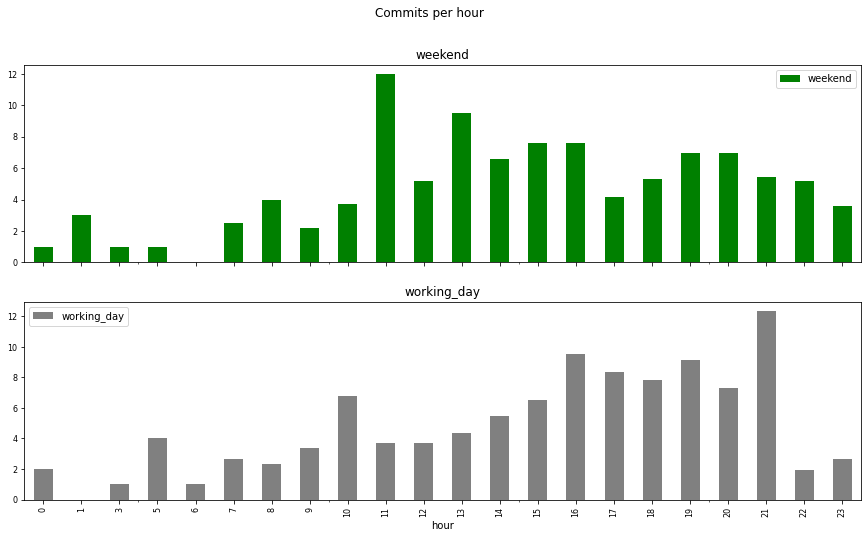

In [ ]:
dataset4.plot(        y=['weekend',"working_day"],
                      kind='bar',
                      subplots=True,
                      fontsize=8,
                      figsize=(15, 8),
                      title = 'Commits per hour' ,
                      xlabel='hour',
                      color=['green',"grey"],
)
plt.show()

In [ ]:
con.close()

In [ ]:
#@markdown **Отличается ли динамика в рабочие и выходные дни?**

Ответ: 21 час -количество коммитов является наибольшим в рабочие дни;
11 часов-количество коммитов является наибольшим в выходные дни.